## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [70]:
data = pd.read_csv('data/penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [71]:
data = data.dropna()

In [72]:
data.Island.unique()

array(['Dream', 'Biscoe', 'Torgersen'], dtype=object)

In [73]:
data = pd.get_dummies(data, columns=['Island'])

In [74]:
data.Species.unique()

array(['Chinstrap', 'Gentoo', 'Adelie'], dtype=object)

In [75]:
data['Clutch Completion'].unique()

array(['Yes', 'No'], dtype=object)

In [76]:
data.Sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [77]:
data[data.Sex == '.']

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
41,Gentoo,Yes,0,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,True,False,False


In [78]:
data = data[data.Sex != '.']

In [79]:
encoder = OrdinalEncoder(
    categories=[
        ['Chinstrap', 'Gentoo', 'Adelie'],
        ['Yes', 'No'],
        ['MALE', 'FEMALE']
    ]
)
data[['Species', 'Clutch Completion', 'Sex']] = encoder.fit_transform(data[['Species', 'Clutch Completion', 'Sex']])

In [80]:
data[['Species', 'Clutch Completion', 'Sex']]

,Species,Clutch Completion,Sex
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
339,0.0,0.0,1.0
340,2.0,0.0,0.0
341,2.0,0.0,1.0
342,1.0,0.0,1.0


Признаки, которые имеют две категории, я думаю, можно закодировать с помощью OrdinalEncoder, так как в knn или в линейной регрессии не должно быть проблем, в отличие от признаков с более чем двумя категориями. Такие признаки могут задавать фейковый порядок (имеется в виду бинарное отношение). Также, например, если категории закодировались 0, 1, 2 то в knn 1 будет равноудалена от 0 и 2, что по факту не имеет никакого смысла (как и в линейной регрессии). Поэтому Island я закодировал с помощью OneHotEncoder, а Sex и Clutch Completion я закодировал с помощью OrdinalEncoder.

Целевая переменная, которая не участвует в линейной функции модели, я закодировал с помощью OrdinalEncoder.

Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [81]:
X = data.drop('Species', axis=1)
y = data['Species']

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [82]:
y.value_counts()

Species
2.0    139
1.0    118
0.0     67
Name: count, dtype: int64

In [83]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Стратификация нужна, чтобы сохранить пропорции классов. Видно, что классы в выборке несбалансированны

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Flipper Length (mm)', 'Body Mass (g)']])
X_test_scaled = scaler.transform(X_test[['Flipper Length (mm)', 'Body Mass (g)']])

In [86]:
knn1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn15 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn25 = KNeighborsClassifier(n_neighbors=25, metric='euclidean')

In [87]:
knn1.fit(X_train_scaled, y_train)
knn3.fit(X_train_scaled, y_train)
knn5.fit(X_train_scaled, y_train)
knn10.fit(X_train_scaled, y_train)
knn15.fit(X_train_scaled, y_train)
knn25.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=25)

In [88]:
y_pred1 = knn1.predict(X_train_scaled)
y_pred3 = knn3.predict(X_train_scaled)
y_pred5 = knn5.predict(X_train_scaled)
y_pred10 = knn10.predict(X_train_scaled)
y_pred15 = knn15.predict(X_train_scaled)
y_pred25 = knn25.predict(X_train_scaled)

In [89]:
y_test_pred1 = knn1.predict(X_test_scaled)
y_test_pred3 = knn3.predict(X_test_scaled)
y_test_pred5 = knn5.predict(X_test_scaled)
y_test_pred10 = knn10.predict(X_test_scaled)
y_test_pred15 = knn15.predict(X_test_scaled)
y_test_pred25 = knn25.predict(X_test_scaled)

In [90]:
pd.DataFrame({
    'k': [1, 3, 5, 10, 15, 25],
    'train_acc': [accuracy_score(y_train, y_pred1), accuracy_score(y_train, y_pred3), accuracy_score(y_train, y_pred5),
                  accuracy_score(y_train, y_pred10), accuracy_score(y_train, y_pred15),
                  accuracy_score(y_train, y_pred25)],
    'test_acc': [accuracy_score(y_test, y_test_pred1), accuracy_score(y_test, y_test_pred3),
                 accuracy_score(y_test, y_test_pred5), accuracy_score(y_test, y_test_pred10),
                 accuracy_score(y_test, y_test_pred15), accuracy_score(y_test, y_test_pred25)]
})


,k,train_acc,test_acc
0,1,0.969027,0.755102
1,3,0.853982,0.755102
2,5,0.831858,0.775510
3,10,0.827434,0.775510
4,15,0.814159,0.755102
5,25,0.796460,0.836735


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

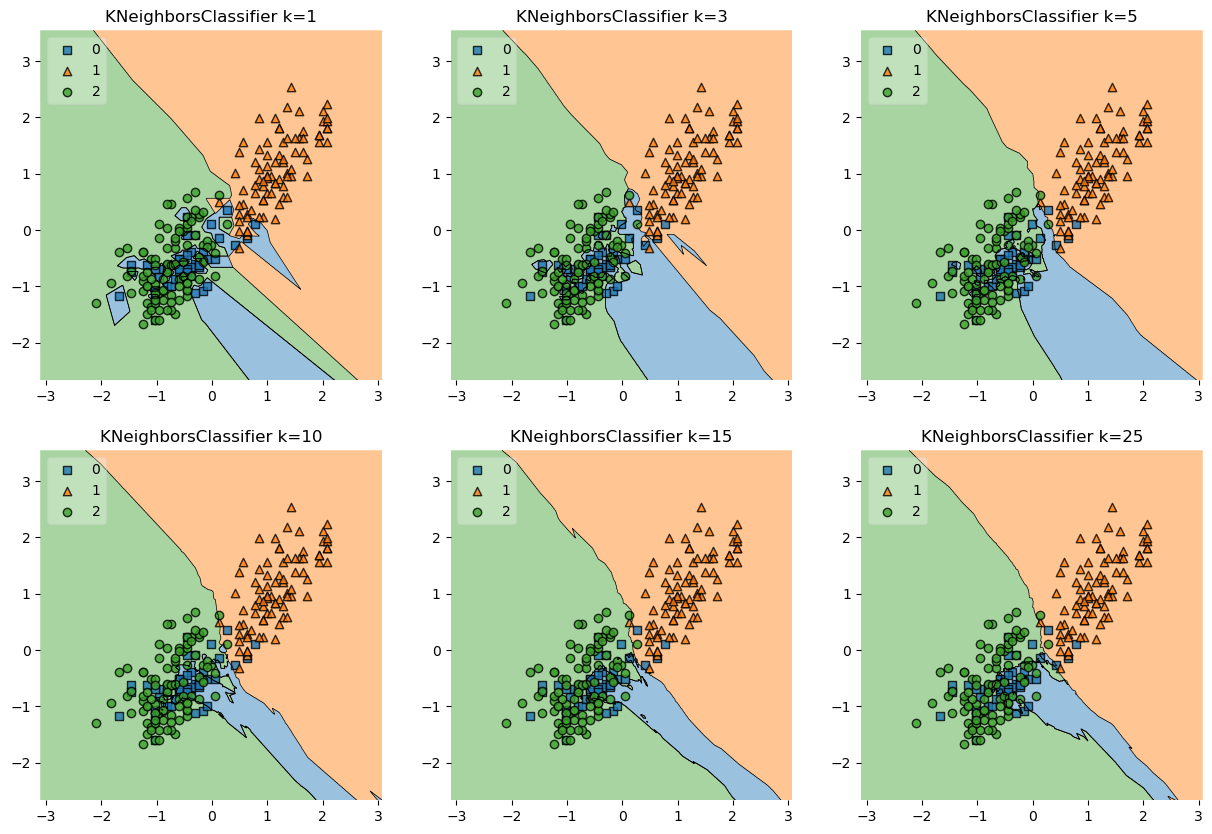

In [27]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15, 10))
for clf, lab, grd in zip([knn1, knn3, knn5, knn10, knn15, knn25],
                         ['KNeighborsClassifier k=1', 'KNeighborsClassifier k=3', 'KNeighborsClassifier k=5',
                          'KNeighborsClassifier k=10', 'KNeighborsClassifier k=15', 'KNeighborsClassifier k=25'],
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train_scaled, y_train.values.astype(np.int64), clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

При k=1 видно переобучение: на тренировке точность очень высокая (≈0.97), а на тесте заметно ниже (≈0.75).

По мере увеличения k модель «сглаживает» границы, и качество на тесте растёт.

Максимальная тестовая точность (≈0.84) достигается при k=25, поэтому это значение k наиболее оптимально среди проверенных.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

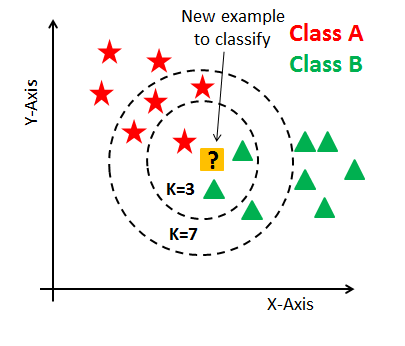

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [29]:
import numpy as np
from collections import Counter


class KNN:
    def __init__(self, k: int):
        if not isinstance(k, int):
            raise TypeError("Parameter k must be an integer.")
        if k <= 0:
            raise ValueError("Parameter k must be positive.")

        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        if not isinstance(X, np.ndarray):
            raise TypeError("X must be a numpy array.")
        if not isinstance(y, np.ndarray):
            raise TypeError("y must be a numpy array.")

        if X.ndim != 2:
            raise ValueError("X must be a 2D array.")
        if y.ndim != 1:
            raise ValueError("y must be a 1D array.")

        if len(X) == 0:
            raise ValueError("X must not be empty.")
        if len(X) != len(y):
            raise ValueError("X and y must have the same length.")

        if self.k > len(X):
            raise ValueError(f"k=({self.k}) must be less than or equal to the number of samples in X ({len(X)}).")

        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        if X_train is None:
            raise RuntimeError("Model is not fitted.")

        if not isinstance(X, np.ndarray):
            raise TypeError("X must be a numpy array.")

        if X.ndim != 2:
            raise ValueError("X must be a 2D array.")

        if len(X) == 0:
            raise ValueError("X must not be empty.")

        if X.shape[1] != self.X_train.shape[1]:
            raise ValueError("X must have the same number of features as X_train.")

        predictions = []
        for x in X:
            distances = self.count_distance(self.X_train, x)
            neighbors_idx = np.argsort(distances)[:self.k]
            neighbors_labels = self.y_train[neighbors_idx]
            most_common_label = Counter(neighbors_labels).most_common(1)[0][0]
            predictions.append(most_common_label)
        return np.array(predictions)

    def count_distance(self, x, y):
        return np.linalg.norm(x - y, axis=1)


In [30]:
# Не меняйте файл!
def test_knn(KNN):
    knn = KNN(k=1)
    X_train = np.array([[1, 1], [2, 2]])
    y_train = np.array([0, 1])
    X_test = np.array([[1.5, 1.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [0]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[9.5, 9.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5.5, 5.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[15, 15]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5, 5], [2, 2]])
    knn.fit(X_train, y_train)
    assert all(knn.predict(X_test) == [1, 0])

In [31]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [32]:
custom_knn1 = KNN(k=1)
custom_knn3 = KNN(k=3)
custom_knn5 = KNN(k=5)
custom_knn10 = KNN(k=10)
custom_knn15 = KNN(k=15)
custom_knn25 = KNN(k=25)

In [33]:
custom_knn1.fit(X_train_scaled, np.array(y_train))
custom_knn3.fit(X_train_scaled, np.array(y_train))
custom_knn5.fit(X_train_scaled, np.array(y_train))
custom_knn10.fit(X_train_scaled, np.array(y_train))
custom_knn15.fit(X_train_scaled, np.array(y_train))
custom_knn25.fit(X_train_scaled, np.array(y_train))

In [34]:
y_pred1 = custom_knn1.predict(X_test_scaled)
y_pred3 = custom_knn3.predict(X_test_scaled)
y_pred5 = custom_knn5.predict(X_test_scaled)
y_pred10 = custom_knn10.predict(X_test_scaled)
y_pred15 = custom_knn15.predict(X_test_scaled)
y_pred25 = custom_knn25.predict(X_test_scaled)

In [35]:
print(f'k = 1: {np.mean(y_pred1 == y_test)}')
print(f'k = 3: {np.mean(y_pred3 == y_test)}')
print(f'k = 5: {np.mean(y_pred5 == y_test)}')
print(f'k = 10: {np.mean(y_pred10 == y_test)}')
print(f'k = 15: {np.mean(y_pred15 == y_test)}')
print(f'k = 25: {np.mean(y_pred25 == y_test)}')

k = 1: 0.7653061224489796
k = 3: 0.7448979591836735
k = 5: 0.7755102040816326
k = 10: 0.7857142857142857
k = 15: 0.7653061224489796
k = 25: 0.8367346938775511


Лучший результат получился при k = 25: `0.8367` на test

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

к**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [4]:
data = data.dropna()
data = data.drop(['Unnamed: 0'], axis=1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [5]:
corr_matrix = data.corr(numeric_only=True).style.background_gradient(cmap='coolwarm').format(precision=2)
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,0.95,0.09,0.15,0.86,0.97,0.95,1.00


Признаки `carat`, `x`, `y`, `z` имеют большую корреляцию с целевой переменной

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [6]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
data.head(10)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
5,0.24,62.8,57.0,336,3.94,3.96,2.48,False,False,False,...,False,True,False,False,False,False,False,False,False,True
6,0.24,62.3,57.0,336,3.95,3.98,2.47,False,False,False,...,True,False,False,False,False,False,False,False,True,False
7,0.26,61.9,55.0,337,4.07,4.11,2.53,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8,0.22,65.1,61.0,337,3.87,3.78,2.49,True,False,False,...,False,False,False,False,False,False,False,True,False,False
9,0.23,59.4,61.0,338,4.00,4.05,2.39,False,False,False,...,False,False,False,False,False,False,True,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.3, random_state=42)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Теперь коэффициент $w_1$ показывает, на сколько увеличится $y$ при увеличении $X_1$ на одно стандартное отклонение (следует просто из формулы нормировки)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)
print(f'Train error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')
print(f'Test error: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')

Train error: 1136.0202087749415
Test error: 1115.6905645006912


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [38]:
coeffs = np.append(lr.coef_, lr.intercept_)

feature_names = np.append(X_train.columns, 'intercept')
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs
})

coef_df

,Feature,Coefficient
0,carat,5338.615671
1,depth,-90.173817
2,table,-60.332280
3,x,-1100.418850
4,y,-6.458917
5,z,-34.258945
6,cut_Fair,-125.711003
7,cut_Good,-41.395989
8,cut_Ideal,51.992206
9,cut_Premium,16.464741


`carat` и `x` имеют веса на порядок выше остальных

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [34]:
from sklearn.linear_model import Lasso, Ridge

In [36]:
lasso = Lasso(10)
lasso.fit(X_train_scaled, y_train)
print('Lasso')
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}")

ridge = Ridge(10)
ridge.fit(X_train_scaled, y_train)
print('Ridge')
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test_scaled))}")

Lasso
Train: 1301845.4182150303
Test: 1255869.101298483
Ridge
Train: 1290606.6065357036
Test: 1244998.771243516


In [39]:
coeffs_lasso = np.append(lasso.coef_, lasso.intercept_)
coeffs_ridge = np.append(ridge.coef_, ridge.intercept_)

coef_df['Lasso coefficient'] = coeffs_lasso
coef_df['Ridge coefficient'] = coeffs_ridge

coef_df

,Feature,Coefficient,Lasso coefficient,Ridge coefficient
0,carat,5338.615671,4872.156396,5301.289062
1,depth,-90.173817,-57.093610,-87.639805
2,table,-60.332280,-47.684857,-60.123686
3,x,-1100.418850,-652.157442,-1057.228888
4,y,-6.458917,-0.000000,-9.605149
5,z,-34.258945,-43.265361,-38.071544
6,cut_Fair,-125.711003,-126.504261,-125.880000
7,cut_Good,-41.395989,-42.809322,-41.480355
8,cut_Ideal,51.992206,41.695815,51.969036
9,cut_Premium,16.464741,0.000000,16.449545


у `Lasso` коэффициенты подуменьшились, но не прям сильно. У `Ridge` почти не изменились

Причем по корреляции можно понять, что коэффициенты у `carat`, `x`, `y`, `z` должны быть скорее всего положительными. Однако модель линейной регрессии размазывает коэффициенты по всем 4 этим признакам. Это можно понять из того, что в `Lasso` уменьшился и коэффициент `corat` и одновременно с этим увеличился коэффициент при `x`.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/home/andre/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+08, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


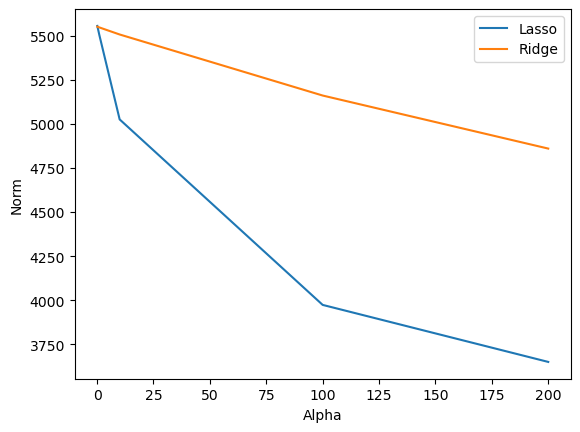

In [43]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []
for alpha in alphas:
    lasso = Lasso(alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))
    ridge = Ridge(alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('Norm')
plt.legend()
plt.show()

У `Lasso` норма уменьшилась сильнее, чем у `Ridge`.

Благодаря тому, что `Lasso` пытается занулить веса, она может отсеивать незначимые или сильно коррелированные признаки (коэффициент уходит в ноль).

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [47]:
from sklearn.linear_model import LassoCV

In [64]:
lasso_cv = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)
lasso_cv.fit(X_train_scaled, y_train)

lasso_cv_table = pd.DataFrame(lasso_cv.mse_path_).rename(columns=dict(enumerate(lasso_cv.alphas_)))
lasso_cv_table = lasso_cv_table.mean(axis=0)
lasso_cv_table

/home/andre/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499002730.2661438, tolerance: 48476565.46527789
  model = cd_fast.enet_coordinate_descent_gram(


200.0    1.527883e+06
100.0    1.492774e+06
10.0     1.509917e+06
1.0      1.440149e+06
0.1      1.438299e+06
dtype: float64

Наилучшее значение получено при $\alpha=0.1$.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [65]:
lasso01 = Lasso(0.1)
lasso01.fit(X_train_scaled, y_train)

coeffs_lasso01 = np.append(lasso01.coef_, lasso01.intercept_)
coef_df['Lasso coefficient alpha=0.1'] = coeffs_lasso01

coef_df[['Feature', 'Lasso coefficient alpha=0.1']]

/home/andre/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+08, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


,Feature,Lasso coefficient alpha=0.1
0,carat,5334.002382
1,depth,-89.837651
2,table,-60.203683
3,x,-1096.087008
4,y,-6.235502
5,z,-34.379211
6,cut_Fair,-132.060372
7,cut_Good,-52.109568
8,cut_Ideal,33.602141
9,cut_Premium,0.000000


`carat` имеет самый большой коэффициент по модулю (5334).

Это говорит о том, что вес (караты) — ключевой фактор ценообразования. Чем больше карат, тем выше цена.

Некоторые категориальные признаки (например, часть `cut_...`, `color_...`, `clarity_...`) могут иметь относительно небольшие коэффициенты.

Это значит, что переход от одной категории к другой категории не даёт сильного вклада в цену с точки зрения модели.

Признаки `x`, `y`, `z` могут иметь отрицательные или небольшие коэффициенты, хотя интуитивно размер должен влиять положительно. Это происходит из-за сильной корреляции между `carat` и линейными размерами `(x, y, z)`.

Модель распределяет вклад цены между этими переменными. Если `carat` уже объяснил большую часть вариации цены, дополнительный учёт `x`, `y`, `z` может иметь отрицательные или незначимые коэффициенты, чтобы скорректировать мультиколлинеарность.

Признаки `depth`, `table` имеют небольшие отрицательные коэффициенты, хотя кажется, что должны положительно влиять на цену. Это опять-таки обуславливается большим вкладом `carat`.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [68]:
print(f"Lasso(0.1): {mean_squared_error(y_test, lasso01.predict(X_test_scaled))}")

print(f"LinearRegression: {mean_squared_error(y_test, lr.predict(X_test_scaled))}")

Lasso(0.1): 1244767.1632514521
LinearRegression: 1244765.435715871


Разница в MSE у моделей почти нулевая, с небольшим преимуществом обычной линейной регрессии. Можно предположить, что если качество при регуляризации не изменилось, то модель изначально не была переобучена.